In [1]:
# 모두의 딥러닝

In [2]:
# 14장 모델 성능 향상시키기

In [3]:
# 14 -1 데이터의 확인과 검증셋

In [ ]:
# 14 -2 모델 업데이트하기

In [ ]:
# 14 -3 그래프로 과적합 확인하기

In [4]:
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [5]:
import pandas as pd
df = pd.read_csv('/content/data/wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [8]:
X = df.iloc[:, 0:12]
y = df.iloc[:,12]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [10]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath = "{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1)

Epoch 1/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.3730 - accuracy: 0.9633 - val_loss: 0.3621 - val_accuracy: 0.9685
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.3698 - accuracy: 0.9651 - val_loss: 0.3602 - val_accuracy: 0.9669
Epoch 3/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.3669 - accuracy: 0.9677 - val_loss: 0.3577 - val_accuracy: 0.9677
Epoch 4/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.3651 - accuracy: 0.9674 - val_loss: 0.3549 - val_accuracy: 0.9685
Epoch 5/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.3625 - accuracy: 0.9684 - val_loss: 0.3523 - val_accuracy: 0.9692
Epoch 6/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.3589 - accuracy: 0.9700 - val_loss: 0.3512 - val_accuracy: 0.9692
Epoch 7/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.3558 - accuracy: 0.9705 - val_loss: 0.3487 - val_accuracy: 0.9692
Epoch 8/2000
8/8 [=

In [20]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:',score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9946
Test accuracy: 0.994615375995636


In [21]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.373047,0.963305,0.362124,0.968462
1,0.369797,0.965101,0.360213,0.966923
2,0.366930,0.967667,0.357680,0.967692
3,0.365127,0.967411,0.354947,0.968462
4,0.362472,0.968437,0.352298,0.969231
...,...,...,...,...
1995,0.013788,0.995638,0.122950,0.983846
1996,0.014427,0.995124,0.119904,0.983077
1997,0.014233,0.995894,0.124098,0.983077
1998,0.013742,0.996151,0.135785,0.982308


In [22]:
import matplotlib.pyplot as plt
y_vloss = hist_df['val_loss'] 
y_loss = hist_df['loss']

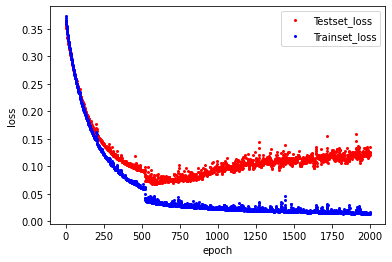

In [23]:
import numpy as np
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 14-4 학습의 자동 중단

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [29]:
modelpath="Ch14-4-bestmodel.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss', verbose=0,
                             save_best_only=True)

In [32]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500,
validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.0158 - accuracy: 0.9954 - val_loss: 0.1140 - val_accuracy: 0.9831
Epoch 2/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.1151 - val_accuracy: 0.9846
Epoch 3/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0175 - accuracy: 0.9951 - val_loss: 0.1089 - val_accuracy: 0.9846
Epoch 4/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.1102 - val_accuracy: 0.9831
Epoch 5/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.1311 - val_accuracy: 0.9823
Epoch 6/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.1288 - val_accuracy: 0.9831
Epoch 7/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0186 - accuracy: 0.9944 - val_loss: 0.1372 - val_accuracy: 0.9808
Epoch 8/2000
